## Labwork 2 | Flat curves.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot(*shapes,
            size=6,
            lim=15,
            major=5,
            with_points=True,
            point_size=5,
            close=True,
            **common_plot_kw):
    fig, ax = plt.subplots(figsize=(size, size))

    for item in shapes:
        if isinstance(item, tuple):
            shape, plot_kw = item
        else:
            shape, plot_kw = item, {}

        shape = np.asarray(shape)
        x = shape[:, 0] / shape[:, 2]
        y = shape[:, 1] / shape[:, 2]

        if close:
            xx = np.append(x, x[0])
            yy = np.append(y, y[0])
        else:
            xx, yy = x, y

        ax.plot(xx, yy, **({"linewidth": 1.6} | common_plot_kw | plot_kw))

        if with_points:
            ax.scatter(x, y, s=point_size, zorder=3)

    ax.set_aspect("equal")
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

    major_ticks = np.arange(-lim, lim + 1, major)
    minor_ticks = np.arange(-lim, lim + 1, 1)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which="major", linestyle="-", linewidth=0.8)
    ax.grid(which="minor", linestyle=":", linewidth=0.5)

    plt.show()


### Task 1 | Conic sections.


a. Задайте эллипс и гиперболу полуосями $a, b$. Составьте параметрические уравнения кривых $x = x(t), y = y(t), t ∈ [0; 2\pi)$.

$$
x = a \cos t, y = b \sin t
$$

$$
x = a \cosh t, y = \pm b \sinh t
$$


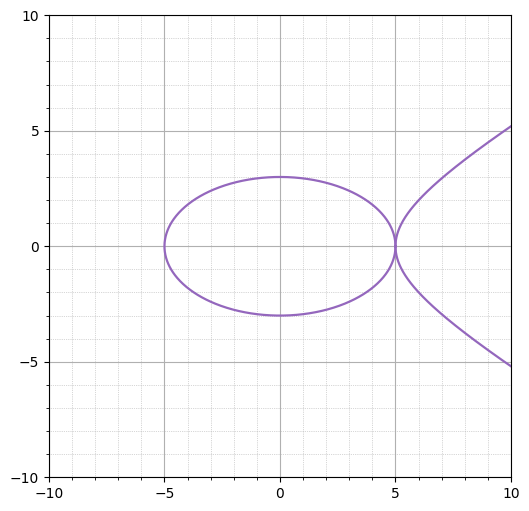

In [3]:
# Полуоси
a = 5
b = 3

# Параметр t
t = np.linspace(0, 2 * np.pi, 1000)

x_ellipse = a * np.cos(t)
y_ellipse = b * np.sin(t)

x_hyperbola = a * np.cosh(t)
y_hyperbola_r = b * np.sinh(t)
y_hyperbola_l = -b * np.sinh(t)

ellipse = np.column_stack((x_ellipse, y_ellipse, np.ones_like(t)))
hyperbola_t = np.column_stack((x_hyperbola, y_hyperbola_r, np.ones_like(t)))
hyperbola_b = np.column_stack((x_hyperbola, y_hyperbola_l, np.ones_like(t)))

plot(ellipse, hyperbola_t, hyperbola_b, lim=10, with_points=False, color='tab:purple', close=False)




b. Найдите уравнения касательных к кривым в точке $(x_0, y_0) = (x(t_0), y(t_0))$.

$$ t_0 = \frac{\pi}{4} $$


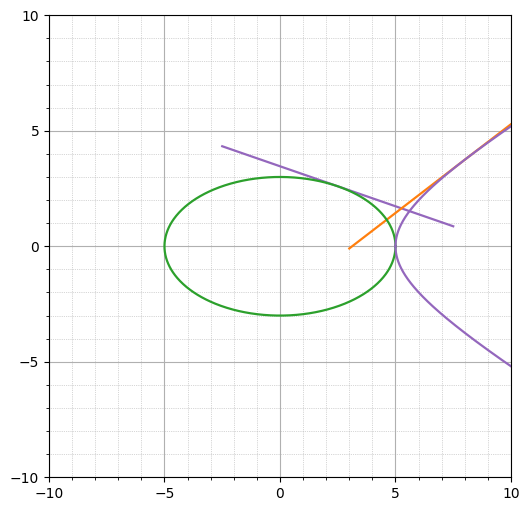

In [18]:
t0 = np.pi / 3

# Координаты точки
x0 = a * np.cos(t0)
y0 = b * np.sin(t0)

# Производные
dx_dt = -a * np.sin(t0)
dy_dt =  b * np.cos(t0)
slope = dy_dt / dx_dt  # dy/dx

# Уравнение касательной: y = slope * (x - x0) + y0
x_vals = np.linspace(x0 - 5, x0 + 5, 100)
y_vals = slope * (x_vals - x0) + y0

tangent = np.column_stack((x_vals, y_vals, np.ones_like(x_vals)))

x0_hyp = a * np.cosh(t0)
y0_hyp = b * np.sinh(t0)

# Производные
dx_dt = a * np.sinh(t0)
dy_dt = b * np.cosh(t0)
slope = dy_dt / dx_dt  # dy/dx

x_vals = np.linspace(x0_hyp - 5, x0_hyp + 5, 100)
y_vals = slope * (x_vals - x0_hyp) + y0_hyp

tangent_hyp = np.column_stack((x_vals, y_vals, np.ones_like(x_vals)))

plot(tangent, (tangent_hyp, {"color": "tab:orange"}), (ellipse, {"color": "tab:green"}), hyperbola_t, hyperbola_b, lim=10, with_points=False, color='tab:purple', close=False)

c. Разбейте промежуток [0; 2𝜋] на 𝑛 участков [𝑡𝑖−1; 𝑡𝑖], 𝑖 = 1, … 𝑛. В середине
каждого участка постройте касательную к кривой.

Вообщем получаем набор производных по точкам элипса, нормализуем их (сводим длинну к 1), и дальше строим отрезок длинной L в точке в направлении касательной.

$$
\vec{n} = \frac{\vec{d}}{|\vec{d}|}
$$


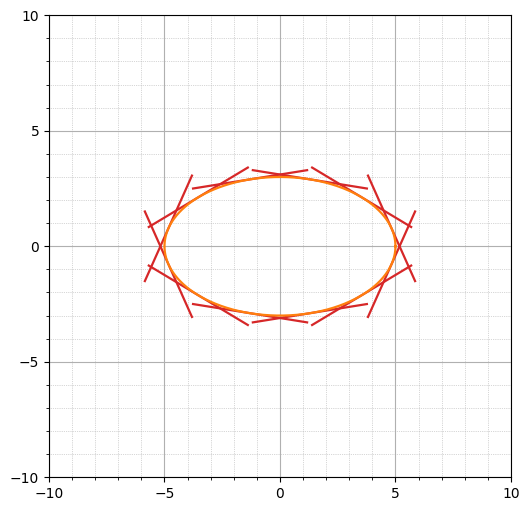

In [19]:
n = 12
L = 5

t_edges = np.linspace(0, 2 * np.pi, n + 1)
t_mid = (t_edges[:-1] + t_edges[1:]) / 2

x0 = a * np.cos(t_mid)
y0 = b * np.sin(t_mid)

dx = -a * np.sin(t_mid)
dy =  b * np.cos(t_mid)

norm = np.sqrt(dx**2 + dy**2)
tx = dx / norm
ty = dy / norm

x1 = x0 - tx * L/2
x2 = x0 + tx * L/2
y1 = y0 - ty * L/2
y2 = y0 + ty * L/2

tangents = []
for i in range(n):
    x_vals = np.linspace(x1[i], x2[i], 2)
    y_vals = np.linspace(y1[i], y2[i], 2)
    tangent = np.column_stack((x_vals, y_vals, np.ones_like(x_vals)))
    tangents.append((tangent, {"color": "tab:red"}))

plot(
    *tangents,
    (ellipse, {"color": "tab:orange"}),
    lim=10,
    with_points=False,
    close=False
)

d. Из отрезков касательных составьте многоугольник, описанный около кривой.

Давайте найдем пересечение 2х параметрических кривых

$$
p_1 + s \cdot d_1 = p_2 + s \cdot d_2 \\
sd_1 - td_2 = p_2 - p_1
$$


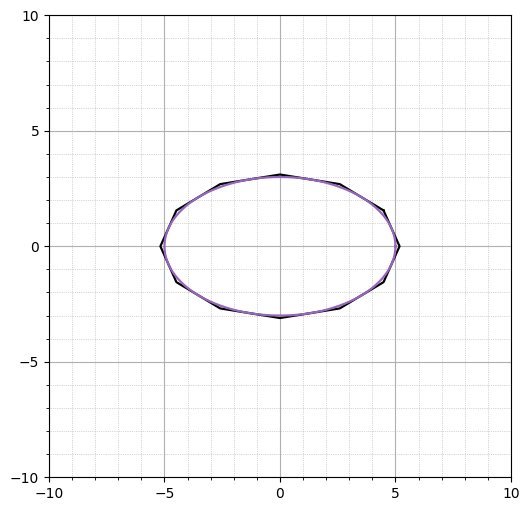

In [20]:
def intersect(p1, d1, p2, d2):
    A = np.array([d1, -d2]).T
    b = p2 - p1
    if np.linalg.matrix_rank(A) < 2:
        return None
    s_t = np.linalg.solve(A, b)
    return p1 + s_t[0] * d1

vertices = []
for i in range(n):
    i1 = i
    i2 = (i + 1) % n

    p1 = np.array([x0[i1], y0[i1]])
    d1 = np.array([tx[i1], ty[i1]])

    p2 = np.array([x0[i2], y0[i2]])
    d2 = np.array([tx[i2], ty[i2]])

    point = intersect(p1, d1, p2, d2)
    if point is not None:
        vertices.append(np.append(point, 1.0))

polygon = np.array(vertices)

plot(
    (polygon, {"color": "black"}),
    (ellipse, {"color": "tab:purple"}),
    with_points=False,
    lim=10,
    close=True
)


e. Найдите уравнение эволюты кривой. Постройте эволюту.

_эволюта - это геометрическое место (траектория) центров кривизны (осциллирующих окружностей) этой кривой, или, эквивалентно, огибающая семейства её нормалей._

_кривизна - $k$ , это величина, обратная радиусу наилучшего вписанного в кривую в этой точке «оканчивающегося» (осциллирующего) круга._

_радиус кривизны - ρ — это просто $1 / k$ ._

https://www.youtube.com/watch?v=7Dsg9UkSP7A

Уравнение Эволюты

Пусть эллипс задан параметрически:

$$
x(t) = a \cos t,\quad y(t) = b \sin t
$$

Общие уровнение эволюты:

$$
\vec{E}(t) = \vec{r}+ \frac{1}{k(t)}\cdot\hat{n}(t)
$$

где $k(t)$ - кривизна, $\hat{n}(t)$ - нормаль к кривой в точке $t$

Тогда его эволюта задаётся формулами:

$$
x_{\text{эвол}}(t) = x(t) - \frac{x'(t)^2 + y'(t)^2}{x'(t) y''(t) - y'(t) x''(t)} \cdot y'(t)
$$

$$
y_{\text{эвол}}(t) = y(t) + \frac{x'(t)^2 + y'(t)^2}{x'(t) y''(t) - y'(t) x''(t)} \cdot x'(t)
$$


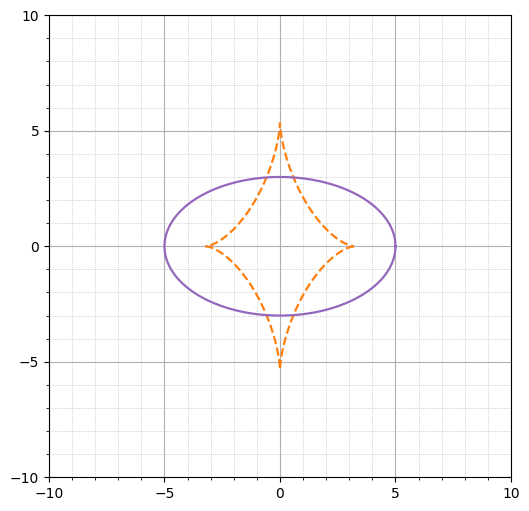

In [ ]:
dx = -a * np.sin(t)
dy = b * np.cos(t)

# Second derivatives
ddx = -a * np.cos(t)
ddy = -b * np.sin(t)

# Curvature numerator and denominator
num = dx**2 + dy**2
den = dx * ddy - dy * ddx

# radius_of_curvature = (num)**1.5 / np.abs(den)

# Evolute coordinates
x_evol = x_ellipse - (num * dy) / den
y_evol = y_ellipse + (num * dx) / den

evolute = np.column_stack((x_evol, y_evol, np.ones_like(t)))

plot(
    (evolute, {"color": "tab:orange", "linestyle": "--"}),
    (ellipse, {"color": "tab:purple"}),
    with_points=False,
    lim=10,
    close=True
)

### Task 2 | Special curves.


#### Спираль Архимедова

а. Запишите полярные или параметрические уравнения выбранных кривых.
Изобразите кривую по уравнению.

В полярных координатах:

$$ r(\theta) = \theta $$

Чтобы перевести в декартовы, а потом в однородные координатах:

$$ x = r \cos \theta $$
$$ y = r \sin \theta $$


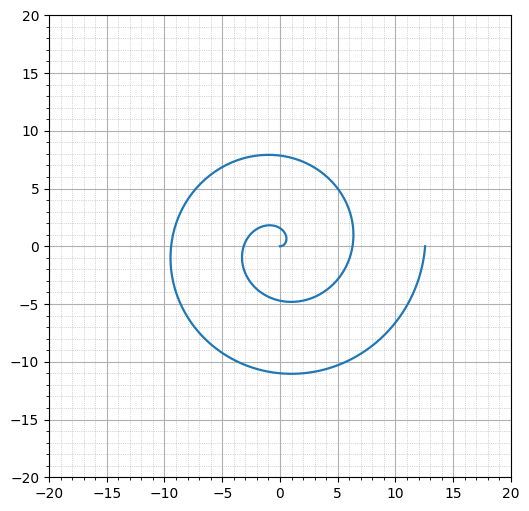

In [8]:
theta = np.linspace(0, 4 * np.pi, 400)
r_spiral = theta

x_spiral = r_spiral * np.cos(theta)
y_spiral = r_spiral * np.sin(theta)
spiral = np.column_stack((x_spiral, y_spiral, np.ones_like(theta)))

plot(
    (spiral, {"color": "tab:blue"}),
    with_points=False,
    lim=20,
    close=False
)

b. Найдите уравнения касательных и нормалей к кривым в какой-либо точке.
Постройте касательный и нормальный вектор к кривой.


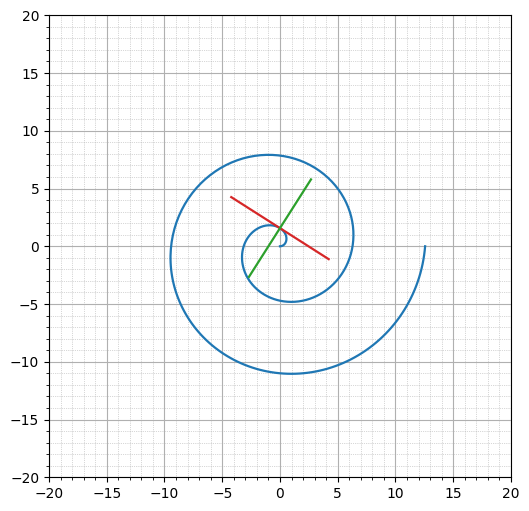

In [9]:
theta0 = np.pi / 2
x0 = theta0 * np.cos(theta0)
y0 = theta0 * np.sin(theta0)

# First derivatives
dx = np.cos(theta0) - theta0 * np.sin(theta0)
dy = np.sin(theta0) + theta0 * np.cos(theta0)

# Normalize tangent vector
tangent_vector = np.array([dx, dy])
tangent_vector = tangent_vector / np.linalg.norm(tangent_vector)

# Normal vector is orthogonal
normal_vector = np.array([-dy, dx])
normal_vector = normal_vector / np.linalg.norm(normal_vector)

# Scale vectors for visualization
length = 5
tangent_line = np.array([
    [x0 - length * tangent_vector[0], y0 - length * tangent_vector[1], 1],
    [x0 + length * tangent_vector[0], y0 + length * tangent_vector[1], 1]
])
normal_line = np.array([
    [x0 - length * normal_vector[0], y0 - length * normal_vector[1], 1],
    [x0 + length * normal_vector[0], y0 + length * normal_vector[1], 1]
])

plot(
    (spiral, {"color": "tab:blue"}),
    (tangent_line, {"color": "tab:red"}),
    (normal_line, {"color": "tab:green"}),
    with_points=False,
    lim=20,
    close=False
)

#### розы

в полярном виде розы выглядят как

$$ r = a cos(n\theta) $$

в декартовом, то есть

$$ x = r cos(\theta) $$

$$ y = r sin(\theta) $$


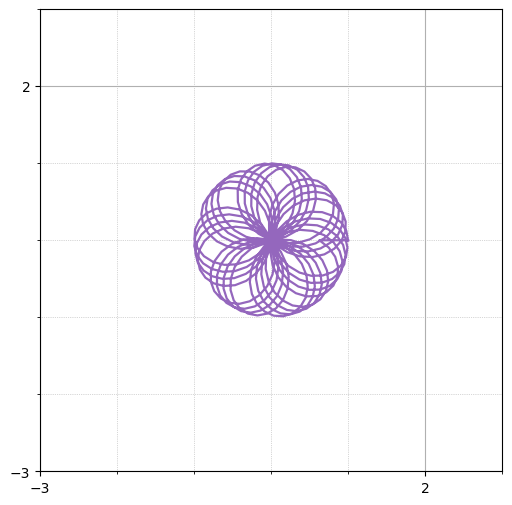

In [25]:
theta = np.linspace(0, 20 * np.pi, 500)
r_rose = np.cos(np.sqrt(2) * theta)

x_rose = r_rose * np.cos(theta)
y_rose = r_rose * np.sin(theta)
rose = np.column_stack((x_rose, y_rose, np.ones_like(theta)))

plot(
    (rose, {"color": "tab:purple"}),
    with_points=False,
    lim=3,
)


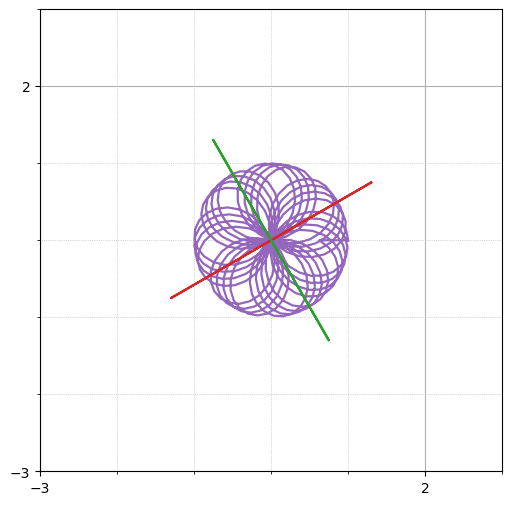

In [26]:

# Choose a point theta0 on the rose
theta0 = np.pi / 6
r0 = np.cos(3 * theta0)
x0 = r0 * np.cos(theta0)
y0 = r0 * np.sin(theta0)

# First derivatives
dr = -3 * np.sin(3 * theta0)
dx = dr * np.cos(theta0) - r0 * np.sin(theta0)
dy = dr * np.sin(theta0) + r0 * np.cos(theta0)

# Normalize tangent vector
tangent_vector = np.array([dx, dy])
tangent_vector = tangent_vector / np.linalg.norm(tangent_vector)

# Normal vector is orthogonal
normal_vector = np.array([-dy, dx])
normal_vector = normal_vector / np.linalg.norm(normal_vector)

# Scale vectors
length = 1.5
tangent_line = np.array([
    [x0 - length * tangent_vector[0], y0 - length * tangent_vector[1], 1],
    [x0 + length * tangent_vector[0], y0 + length * tangent_vector[1], 1]
])
normal_line = np.array([
    [x0 - length * normal_vector[0], y0 - length * normal_vector[1], 1],
    [x0 + length * normal_vector[0], y0 + length * normal_vector[1], 1]
])

plot(
    (rose, {"color": "tab:purple"}),
    (tangent_line, {"color": "tab:red"}),
    (normal_line, {"color": "tab:green"}),
    with_points=False,
    lim=3,
)
